In [ ]:
# =============================================================================
# 1. Library Imports
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(style='whitegrid')  # Professional plotting style

"""
Purpose: Import essential data analysis libraries
- pandas: Data manipulation
- numpy: Numerical operations
- matplotlib/seaborn: Visualization
- scikit-learn: Machine learning models
"""

'\nPurpose: Import essential data analysis libraries\n- pandas: Data manipulation\n- numpy: Numerical operations\n- matplotlib/seaborn: Visualization\n- scikit-learn: Machine learning models\n'

In [ ]:
# =============================================================================
# 2. Data Loading & Initial Inspection
# =============================================================================
# Load datasets
sales_df = pd.read_csv('sales data for analysis.csv')
credit_df = pd.read_csv('credit data for analysis.csv')

# Initial data check
print("Sales Data Shape:", sales_df.shape)
print("Credit Data Shape:", credit_df.shape)
print("\nSales Data Sample:\n", sales_df.head(2))
print("\nCredit Data Sample:\n", credit_df.head(2))

"""
Purpose: Load raw data and perform initial validation
- Ensures data is loaded correctly
- Verifies dataset dimensions and basic structure
"""

Sales Data Shape: (985, 14)
Credit Data Shape: (296, 3)

Sales Data Sample:
   Customer Name        Date Product name Category   Weight(in gm.)  Rate /gm  \
0     SHERSINGH  09/12/2020         RING      GOLD             2.6    5100.0   
1    SHYAM BABU  09/12/2020       ANKLET    SILVER            50.0      62.0   

  Diffrence  Making/Labour charges Discount  Total Amount(₹) Payment Type\t  \
0      ₹0.00                 ₹0.00    ₹0.00       ₹13,260.00           Full   
1    ₹100.00               ₹100.00    ₹0.00        ₹3,200.00           Full   

   Number of Payments Exchange Used Exchange Value (₹)          
0                   0            No                      ₹0.00  
1                   0            No                      ₹0.00  

Credit Data Sample:
    Customer Name        Date Amount paid by customer(₹)
0          UMESH  30/05/2020                   1,500.00
1  RAMOTAR JATAV  14/10/2020                   1,000.00


'\nPurpose: Load raw data and perform initial validation\n- Ensures data is loaded correctly\n- Verifies dataset dimensions and basic structure\n'

In [ ]:
# =============================================================================
# 1. Data Cleaning Pipeline
# =============================================================================
def clean_data(raw_df, currency_cols=[], is_sales=True):
    """
    Cleans column names, currency columns, and dates.
    """
    df = raw_df.copy()
    df.columns = df.columns.str.strip()

    # Clean currency columns
    for col in currency_cols:
        if col in df.columns:
            df[col] = df[col].astype(str)\
                             .str.replace(r'[₹,]', '', regex=True)\
                             .astype(float)

    # Convert dates
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    return df

# Apply cleaning
sales_df = clean_data(
    sales_df,
    currency_cols=["Making/Labour charges", "Discount", "Total Amount(₹)", "Exchange Value (₹)"],
    is_sales=True
)
credit_df = clean_data(
    credit_df,
    currency_cols=["Amount paid by customer(₹)"],
    is_sales=False
)

print("Sales data cleaned. Shape:", sales_df.shape)
print("Credit data cleaned. Shape:", credit_df.shape)


Sales data cleaned. Shape: (985, 14)
Credit data cleaned. Shape: (296, 3)


 2. Descriptive Statistics by Category

In [ ]:
# =============================================================================
# 2. Descriptive Statistics by Category
# =============================================================================
category_stats = sales_df.groupby('Category').agg(
    Transaction_Count=('Total Amount(₹)', 'count'),
    Mean_Value=('Total Amount(₹)', 'mean'),
    Median_Value=('Total Amount(₹)', 'median'),
    Value_Range=('Total Amount(₹)', lambda x: x.max() - x.min())
).reset_index()

print("Descriptive statistics by category:")
display(category_stats)


Descriptive statistics by category:


,Category,Transaction_Count,Mean_Value,Median_Value,Value_Range
0,GOLD,391,9548.537084,7400.0,80050.0
1,SILVER,594,4232.616162,3600.0,21200.0


3. KPI Analysis: Average Transaction Value & Best-Sellers
python

In [ ]:
# =============================================================================
# 3. KPI Analysis: Average Transaction Value & Best-Sellers
# =============================================================================

# Average Transaction Value (ATV) by category
category_kpi = sales_df.groupby('Category').agg(
    Total_Revenue=('Total Amount(₹)', 'sum'),
    Transaction_Count=('Total Amount(₹)', 'count')
)
category_kpi['ATV'] = category_kpi['Total_Revenue'] / category_kpi['Transaction_Count']

print("Average Transaction Value by Category:")
display(category_kpi[['ATV']])

# Best-selling products (filtering out those with <5 sales)
product_counts = sales_df['Product name'].value_counts()
popular_products = product_counts[product_counts >= 5].index.tolist()

best_sellers = sales_df[sales_df['Product name'].isin(popular_products)]\
    .groupby('Product name').agg(
        Total_Revenue=('Total Amount(₹)', 'sum'),
        Units_Sold=('Product name', 'count')
    ).sort_values('Total_Revenue', ascending=False)

print("Best-selling products (only products with 5 or more sales):")
display(best_sellers)


Average Transaction Value by Category:


,ATV
Category,
GOLD,9548.537084
SILVER,4232.616162


Best-selling products (only products with 5 or more sales):


,Total_Revenue,Units_Sold
Product name,,
ANKLET,2068337.0,444
EARRINGS,1175575.0,131
JHUMKI,629931.0,26
PENDANT,306950.0,34
5 PENDANT SET,284500.0,13
RING,237910.0,26
CHAIN,229587.0,23
NECKLACE,227050.0,7
BANGLE,216180.0,50


📊 4. Visualization: Best-Selling Products


<ipython-input-50-527ca599aac0>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




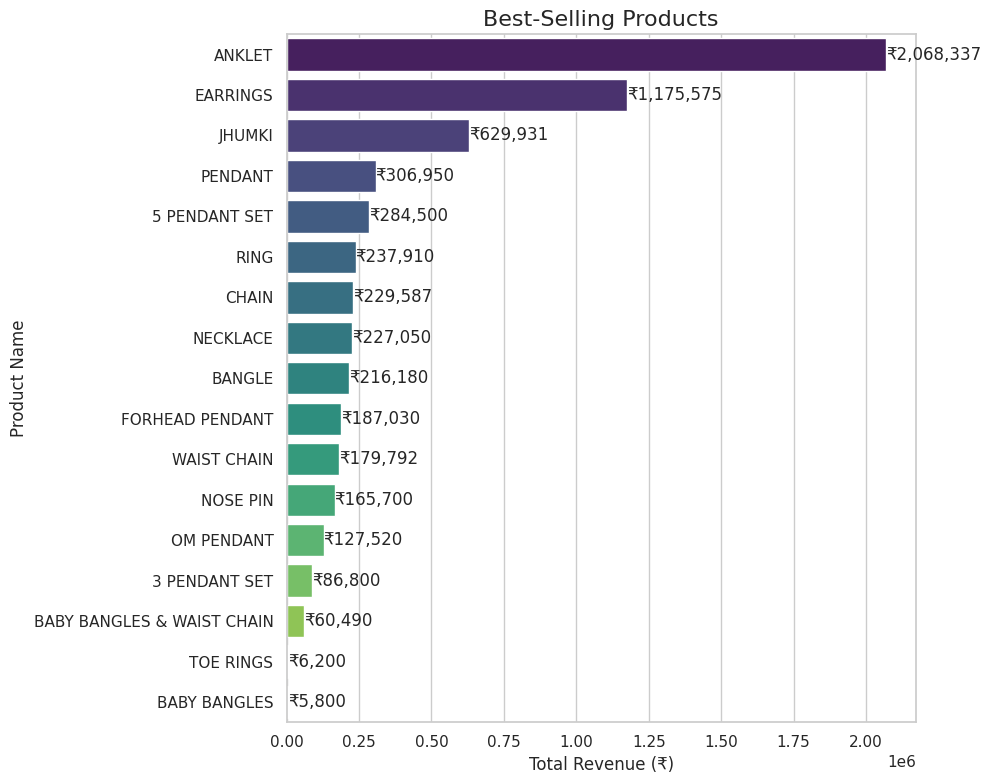

In [ ]:
# =============================================================================
# 4. Visualization: Best-Selling Products
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(
    y=best_sellers.index,
    x=best_sellers['Total_Revenue'],
    palette='viridis'
)
for index, value in enumerate(best_sellers['Total_Revenue']):
    plt.text(value, index, f'₹{value:,.0f}', va='center')

plt.title('Best-Selling Products', fontsize=16)
plt.xlabel('Total Revenue (₹)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


📅 5. Trend Analysis: Monthly Sales by Product



<ipython-input-53-998b3d6c8082>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



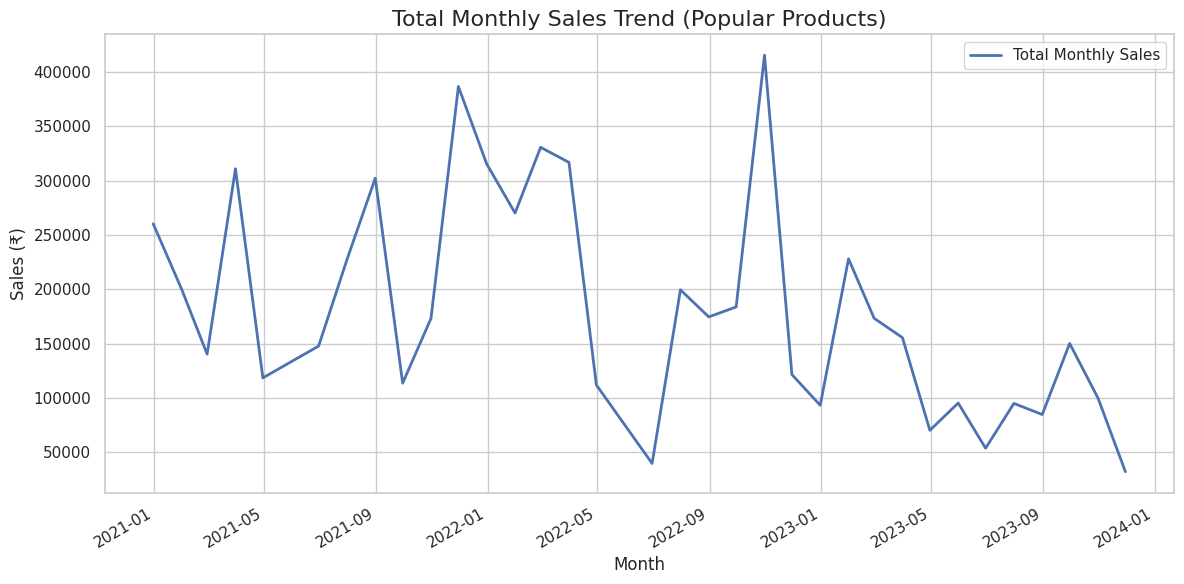

In [ ]:
# =============================================================================
# 5. Trend Analysis: Monthly Sales by Product
# =============================================================================
monthly_sales = sales_df.set_index('Date')\
    .groupby([pd.Grouper(freq='M'), 'Product name'])['Total Amount(₹)'].sum()\
    .unstack(fill_value=0)

# Only keep products with 5+ sales
monthly_sales = monthly_sales[popular_products]

# Plot total monthly sales of all popular products
plt.figure(figsize=(12, 6))
monthly_sales.sum(axis=1).plot(label='Total Monthly Sales', lw=2)
plt.title('Total Monthly Sales Trend (Popular Products)', fontsize=16)
plt.ylabel('Sales (₹)')
plt.xlabel('Month')
plt.legend()
plt.tight_layout()
plt.show()


👥 6. Customer Profiling & Segmentation


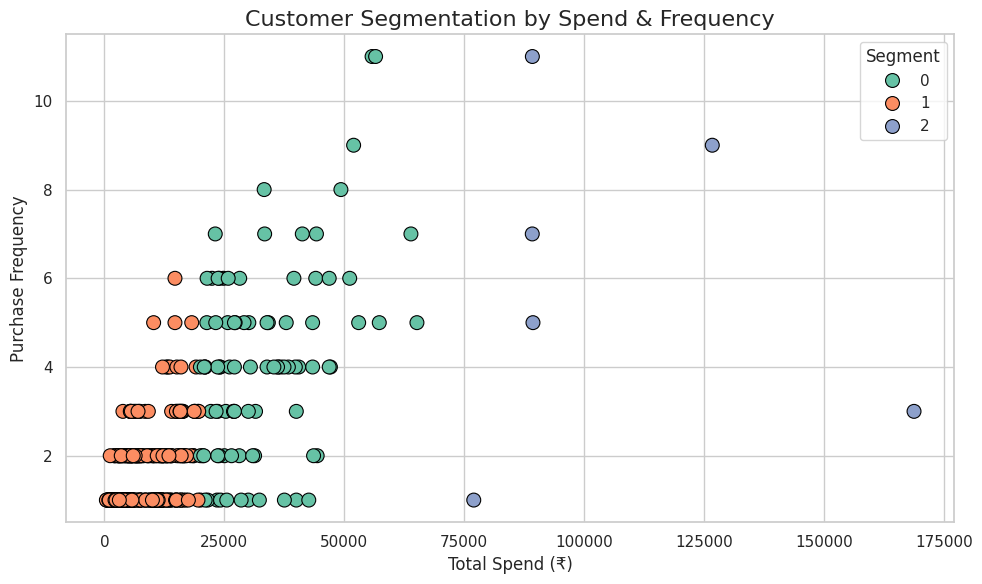

In [ ]:
# =============================================================================
# Clean Customer Names using RapidFuzz
# =============================================================================
!pip install rapidfuzz

import pandas as pd
from rapidfuzz import process, fuzz
from collections import defaultdict

# Step 1: Basic name cleanup
sales_df['Customer Name'] = sales_df['Customer Name'].str.upper().str.strip()

# Step 2: Get unique names
unique_names = sales_df['Customer Name'].unique()

# Step 3: Build clusters based on fuzzy similarity
clusters = defaultdict(list)
processed = set()

for name in unique_names:
    if name in processed:
        continue
    matches = process.extract(name, unique_names, scorer=fuzz.token_sort_ratio, limit=None)
    cluster_root = name
    for match_name, score, _ in matches:
        if score >= 90 and match_name not in processed:
            clusters[cluster_root].append(match_name)
            processed.add(match_name)

# Step 4: Create mapping from variant → root name
final_mapping = {}
for root, variants in clusters.items():
    for v in variants:
        final_mapping[v] = root

# Step 5: Apply mapping
sales_df['Customer Name (Cleaned)'] = sales_df['Customer Name'].map(final_mapping)

# =============================================================================
# Customer Profiling & Segmentation (Improved with Cleaned Names)
# =============================================================================
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Use cleaned names for grouping
customer_profiles = sales_df.groupby('Customer Name (Cleaned)').agg(
    Total_Spend=('Total Amount(₹)', 'sum'),
    Purchase_Frequency=('Product name', 'count'),
    Category_Variety=('Category', 'nunique')
)

# Prepare data for clustering
X = customer_profiles[['Total_Spend', 'Purchase_Frequency']]
kmeans = KMeans(n_clusters=3, random_state=42)
customer_profiles['Segment'] = kmeans.fit_predict(X)

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total_Spend', y='Purchase_Frequency',
    hue='Segment', data=customer_profiles,
    palette='Set2', s=100, edgecolor='black'
)
plt.title('Customer Segmentation by Spend & Frequency', fontsize=16)
plt.xlabel('Total Spend (₹)')
plt.ylabel('Purchase Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

sunburst_data = sales_df.groupby(['Category', 'Product name']).size().reset_index(name='Units_Sold')
fig = px.sunburst(
    sunburst_data,
    path=['Category', 'Product name'],
    values='Units_Sold',
    color='Units_Sold',
    color_continuous_scale='viridis',
    title='Product Category & Demand Hierarchy'
)
fig.show()


<ipython-input-56-867ea759829e>:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-56-867ea759829e>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




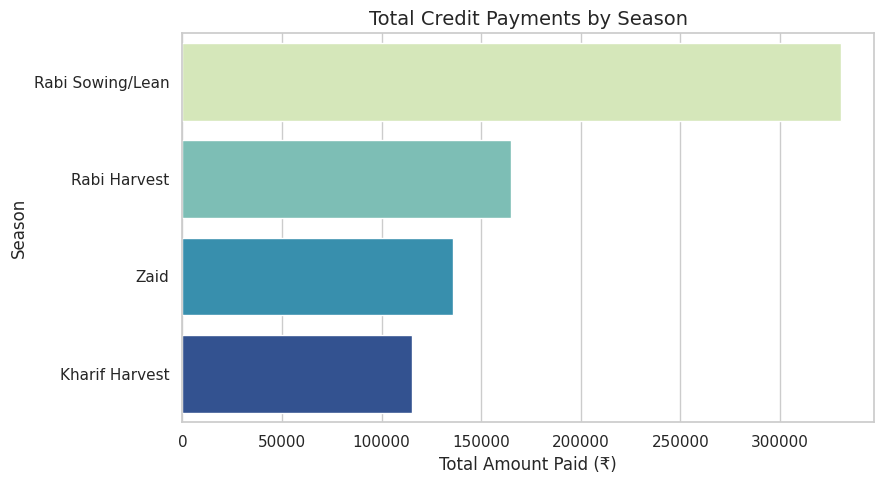

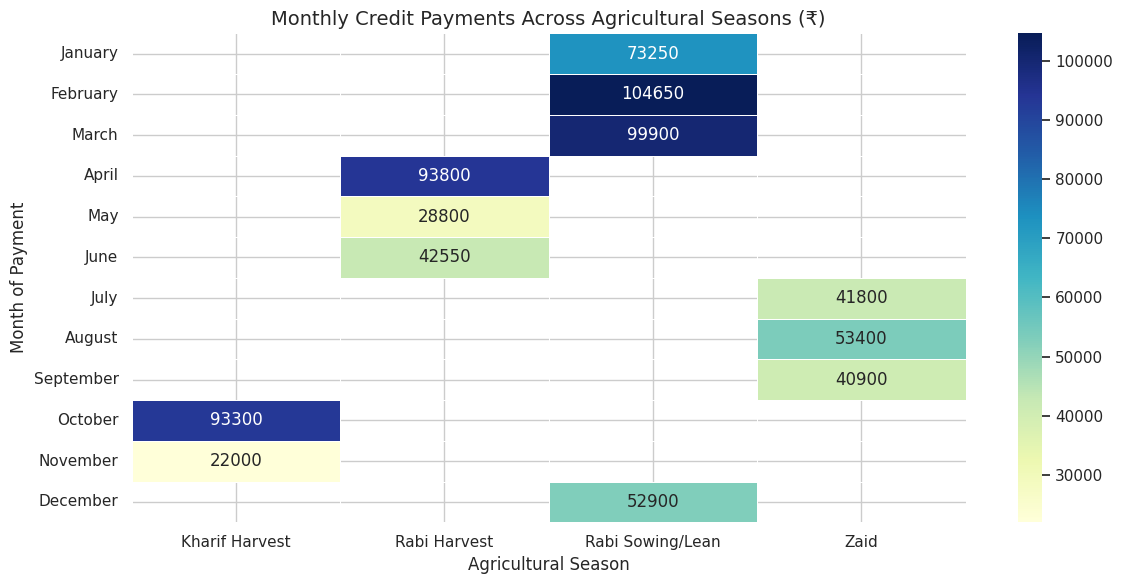

In [ ]:
# Preprocessing: Season assignment
credit_df['Date'] = pd.to_datetime(credit_df['Date'], errors='coerce')
credit_df['Month'] = credit_df['Date'].dt.month
credit_df['Year'] = credit_df['Date'].dt.year
credit_df['Payment_Month'] = credit_df['Date'].dt.month_name()

def assign_season(month):
    if month in [4, 5, 6]:
        return 'Rabi Harvest'
    elif month in [7, 8, 9]:
        return 'Zaid'
    elif month in [10, 11]:
        return 'Kharif Harvest'
    elif month in [12, 1, 2, 3]:
        return 'Rabi Sowing/Lean'
    else:
        return 'Other'

credit_df['Season'] = credit_df['Month'].apply(assign_season)
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate for bar chart
seasonal_payments = credit_df.groupby('Season')['Amount paid by customer(₹)'].agg(['sum', 'count']).reset_index()

# Sort by total payments
seasonal_payments = seasonal_payments.sort_values(by='sum', ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(x='sum', y='Season', data=seasonal_payments, palette='YlGnBu')
plt.title('Total Credit Payments by Season', fontsize=14)
plt.xlabel('Total Amount Paid (₹)')
plt.ylabel('Season')
plt.tight_layout()
plt.show()
# Month order for proper sorting
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# Cross-tab for heatmap
pivot = pd.crosstab(
    credit_df['Payment_Month'],
    credit_df['Season'],
    values=credit_df['Amount paid by customer(₹)'],
    aggfunc='sum'
).reindex(month_order)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Monthly Credit Payments Across Agricultural Seasons (₹)', fontsize=14)
plt.xlabel('Agricultural Season')
plt.ylabel('Month of Payment')
plt.tight_layout()
plt.show()


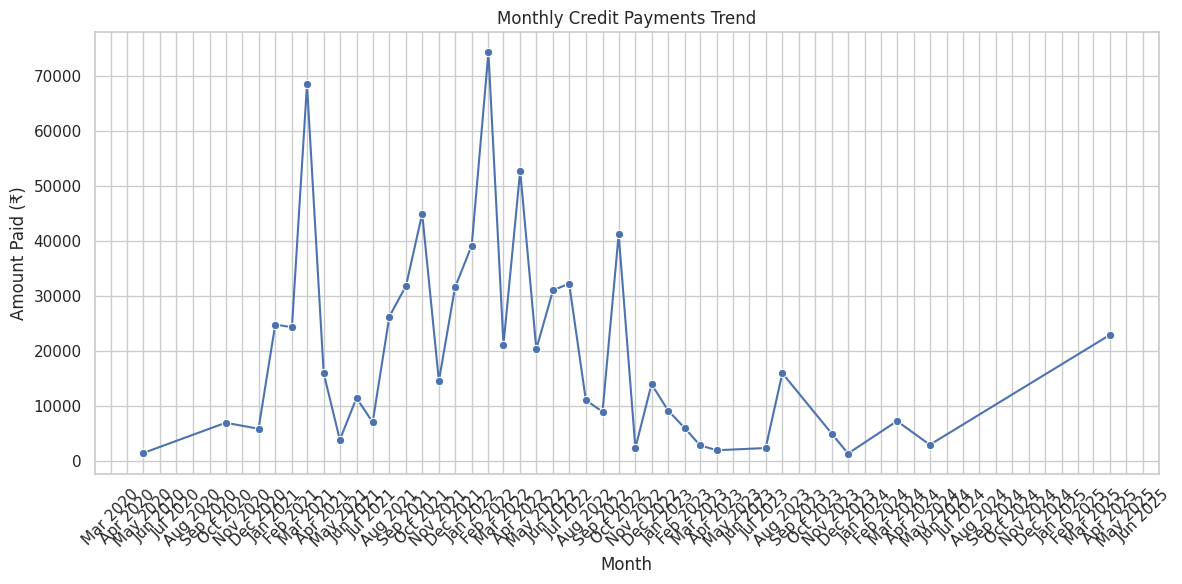

In [ ]:
# Group by month for finer granularity
monthly_trend = credit_df.groupby(['Year', 'Month'])['Amount paid by customer(₹)'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=pd.to_datetime(monthly_trend[['Year', 'Month']].assign(DAY=1)),
             y='Amount paid by customer(₹)', data=monthly_trend, marker='o')
plt.title('Monthly Credit Payments Trend')
plt.ylabel('Amount Paid (₹)')
plt.xlabel('Month')
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Product Weight vs. Revenue Scatterplot Matrix

This matrix reveals hidden relationships between product weight and revenue generation across categories. Larger bubbles show frequently sold items, helping identify optimal weight ranges for inventory planning.


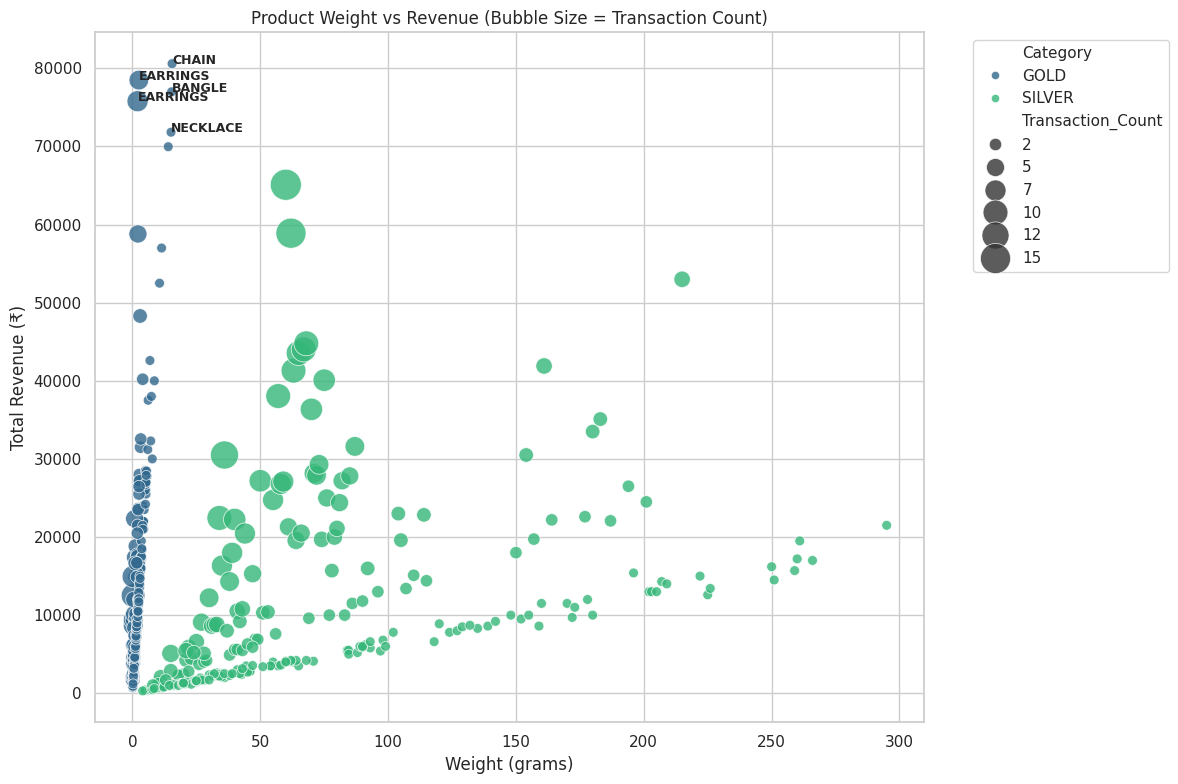

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the bubble data
weight_analysis = sales_df.groupby(['Product name', 'Category', 'Weight(in gm.)']).agg(
    Total_Revenue=('Total Amount(₹)', 'sum'),
    Transaction_Count=('Total Amount(₹)', 'count')
).reset_index()

# Identify top 5 by revenue
top_products = weight_analysis.sort_values('Total_Revenue', ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=weight_analysis,
                x='Weight(in gm.)', y='Total_Revenue',
                hue='Category', size='Transaction_Count',
                sizes=(50, 500), palette='viridis', alpha=0.8)

# Annotate top products
for _, row in top_products.iterrows():
    plt.text(row['Weight(in gm.)'], row['Total_Revenue'],
             row['Product name'], fontsize=9, fontweight='bold')

# Final touches
plt.title('Product Weight vs Revenue (Bubble Size = Transaction Count)')
plt.xlabel('Weight (grams)')
plt.ylabel('Total Revenue (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



3. Installment Payment Behavior

Justification:
Shows customer preference for installments while correlating payment count with transaction values. Helps design better financing plans.



<ipython-input-68-b78387dc3844>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



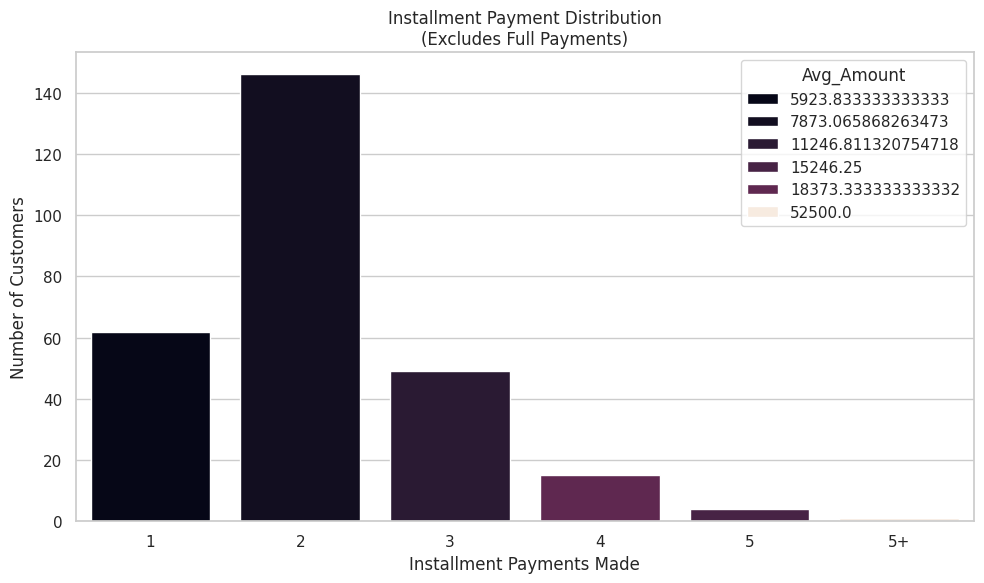

In [ ]:
# Filter out full-payment customers (0 installments)
installment_df = sales_df[sales_df['Number of Payments'] > 0]

# Optional: Bin payment counts >5 into one category
installment_df['Payment Bin'] = installment_df['Number of Payments'].apply(
    lambda x: str(x) if x <= 5 else '5+'
)

# Re-analyze
payment_analysis = installment_df.groupby('Payment Bin').agg(
    Total_Customers=('Customer Name', 'nunique'),
    Avg_Amount=('Total Amount(₹)', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='Payment Bin', y='Total_Customers',
    hue='Avg_Amount', data=payment_analysis,
    palette='rocket', dodge=False
)
plt.title('Installment Payment Distribution\n(Excludes Full Payments)')
plt.ylabel('Number of Customers')
plt.xlabel('Installment Payments Made')
plt.tight_layout()
plt.show()


5. Weight-Based Demand Forecasting

Reveals how product weight categories follow different demand patterns, crucial for raw material procurement.



<ipython-input-73-ae026e9d8ef4>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-73-ae026e9d8ef4>:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



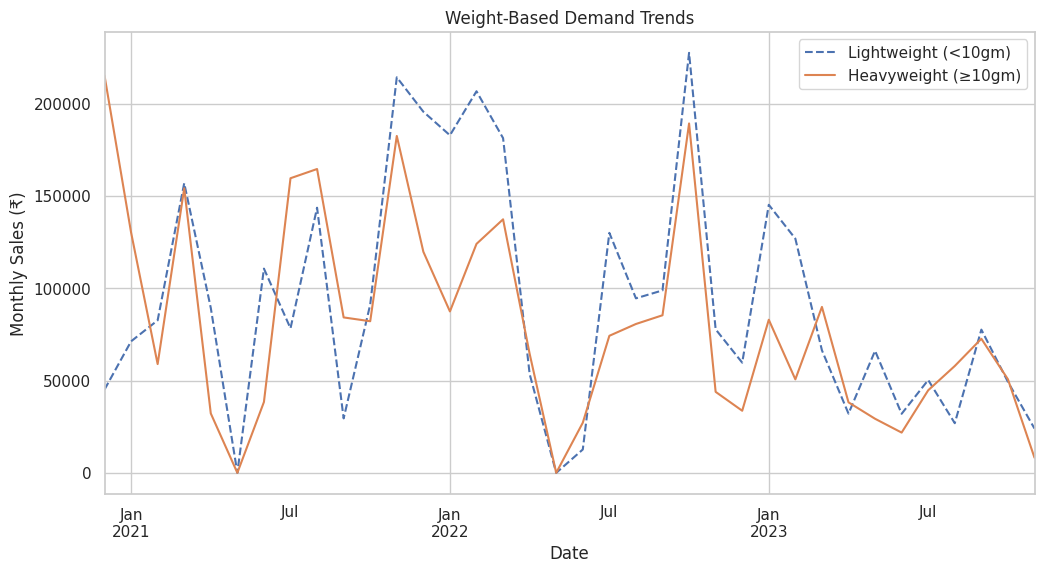

In [ ]:
# Weight-Based Forecasting
light_products = sales_df[sales_df['Weight(in gm.)'] < 10]
heavy_products = sales_df[sales_df['Weight(in gm.)'] >= 10]

plt.figure(figsize=(12,6))
light_products.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount(₹)'].sum().plot(
    label='Lightweight (<10gm)', linestyle='--')
heavy_products.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount(₹)'].sum().plot(
    label='Heavyweight (≥10gm)')
plt.title('Weight-Based Demand Trends')
plt.ylabel('Monthly Sales (₹)')
plt.legend()
plt.show()


2. Inventory Optimization: Identify Overstocked and Understocked Products

Justification:
The report stresses the importance of inventory optimization—avoiding both stockouts and overstocking by analyzing sales frequency and inventory levels.

Implementation:
Assume you have a column Current Stock (if not, you can simulate it for demonstration). Identify products that are at risk of overstock or stockout based on historical monthly sales.

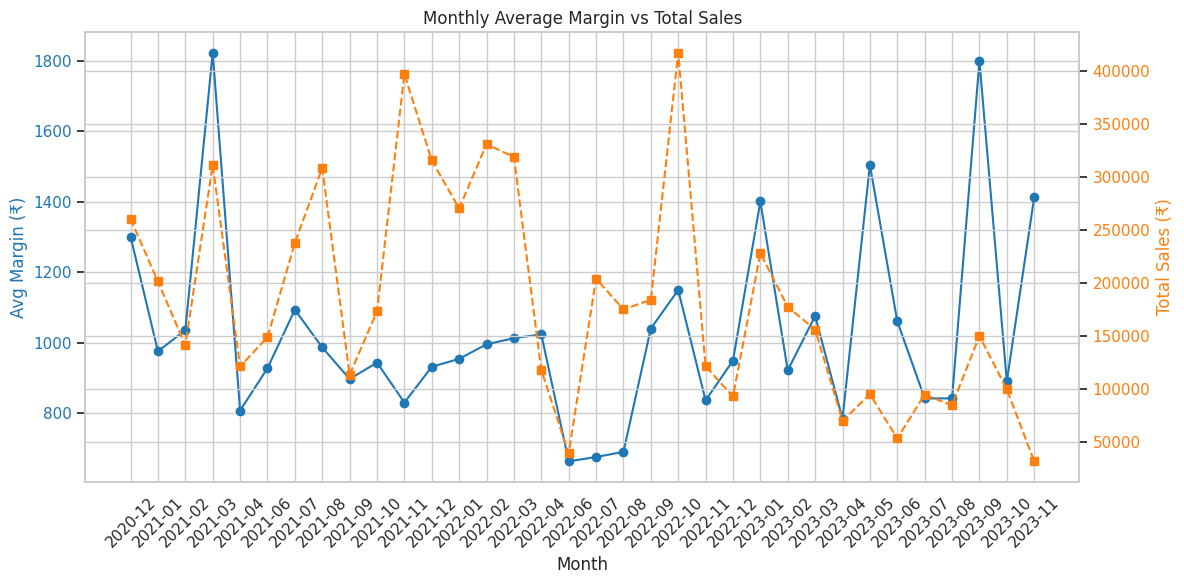

In [ ]:
monthly_summary = sales_df.groupby('Month').agg(
    Avg_Margin = ('Margin_₹', 'mean'),
    Total_Sales = ('Total Amount(₹)', 'sum')
).reset_index()

monthly_summary['Month'] = monthly_summary['Month'].astype(str)

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Margin (₹)', color=color)
ax1.plot(monthly_summary['Month'], monthly_summary['Avg_Margin'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('Total Sales (₹)', color=color)
ax2.plot(monthly_summary['Month'], monthly_summary['Total_Sales'], marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Average Margin vs Total Sales')
plt.tight_layout()
plt.show()


2. Product Demand and Sales Trends

a. Sunburst Chart (Plotly)
Visualizes category → product → sales.

Missing Values Summary (Sales Data):
Customer Name              0
Date                       0
Product name               0
Category                   0
Weight(in gm.)             0
Rate /gm                   0
Diffrence                  0
Making/Labour charges      0
Discount                   0
Total Amount(₹)            0
Payment Type               0
Number of Payments         0
Exchange Used              0
Exchange Value (₹)         0
Days Delayed               0
Customer Segment           0
Paid_Status                0
Month_Year                 0
Month                      0
Customer Name (Cleaned)    0
Payment Bin                0
Base_Price                 0
Margin                     0
Margin_Pct                 0
Margin_₹                   0
dtype: int64

Missing Values Summary (Credit Data):
Customer Name                 0
Date                          0
Amount paid by customer(₹)    0
Month                         0
Year                          0
Payment_Month             

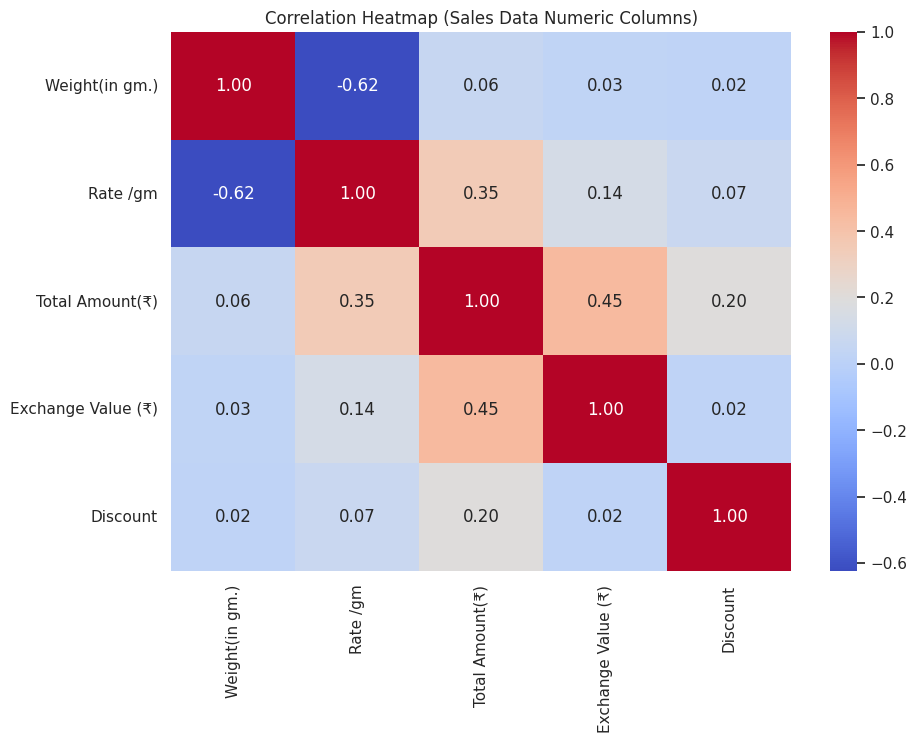

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Clean Column Names ---
sales_df.columns = sales_df.columns.str.strip()
credit_df.columns = credit_df.columns.str.strip()

# --- Step 2: Convert Relevant Columns to Numeric ---
numeric_cols_sales = ['Weight(in gm.)', 'Rate /gm', 'Total Amount(₹)', 'Exchange Value (₹)', 'Discount']
for col in numeric_cols_sales:
    if col in sales_df.columns:
        sales_df[col] = pd.to_numeric(
            sales_df[col].astype(str).str.replace(r'[₹,]', '', regex=True), errors='coerce'
        )

if 'Amount paid by customer(₹)' in credit_df.columns:
    credit_df['Amount paid by customer(₹)'] = pd.to_numeric(
        credit_df['Amount paid by customer(₹)'].astype(str).str.replace(r'[₹,]', '', regex=True), errors='coerce'
    )

# --- Step 3: Parse Date Columns if exist ---
if 'Date' in sales_df.columns:
    sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

# --- Step 4: Missing Values Summary ---
print("Missing Values Summary (Sales Data):")
print(sales_df.isna().sum())
print("\nMissing Values Summary (Credit Data):")
print(credit_df.isna().sum())

# --- Step 5: Numeric Columns Summary Stats ---
num_cols_sales = [col for col in numeric_cols_sales if col in sales_df.columns]
print("\nSummary Statistics (Sales Data):")
print(sales_df[num_cols_sales].describe().T[['count','mean','std','min','25%','50%','75%','max']])

if 'Amount paid by customer(₹)' in credit_df.columns:
    print("\nSummary Statistics (Credit Data):")
    print(credit_df['Amount paid by customer(₹)'].describe())


# --- Step 9: Correlation Heatmap for Numeric Columns ---
if len(num_cols_sales) > 1:
    plt.figure(figsize=(10, 7))
    corr = sales_df[num_cols_sales].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap (Sales Data Numeric Columns)')
    plt.show()



b. Seasonality Line Chart

Shows sales trend by category over months.

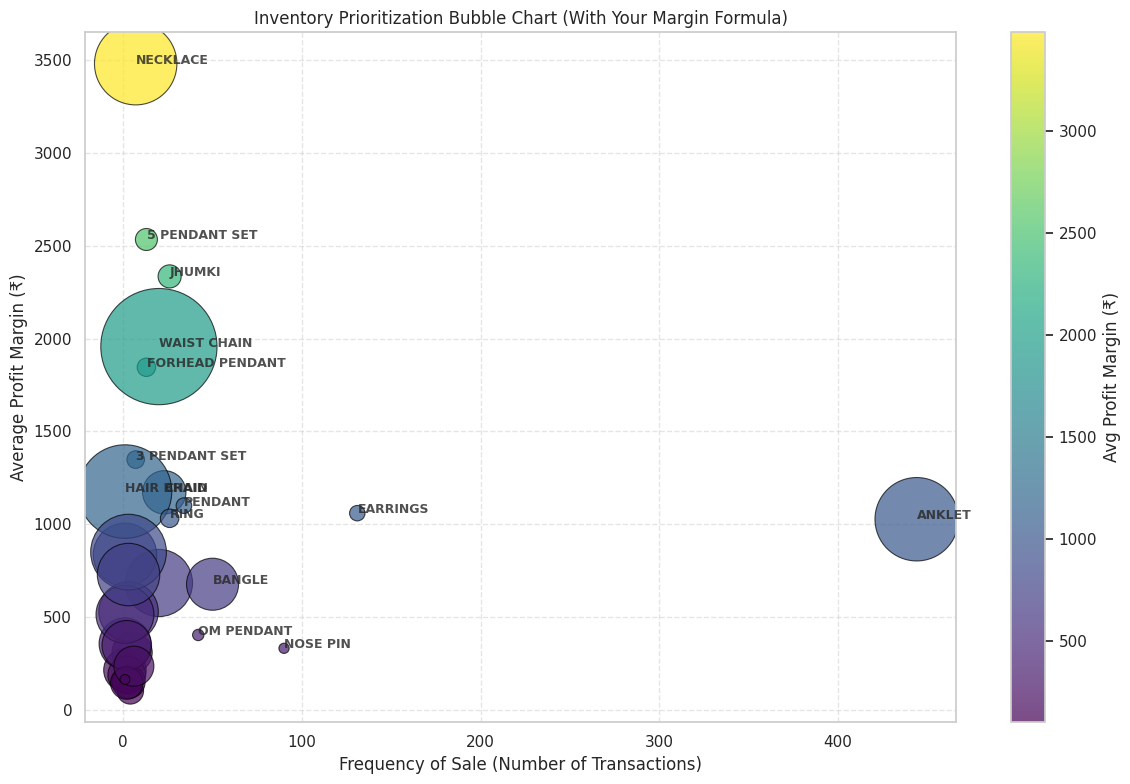

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate margin as per your formula
def calculate_margin(row):
    base_margin = 0
    if row['Category'].lower() == 'gold':
        base_margin = 0.10 * row['Weight(in gm.)'] * row['Rate /gm']
    elif row['Category'].lower() == 'silver':
        base_margin = 0.20 * row['Weight(in gm.)'] * row['Rate /gm']
    else:
        base_margin = 0  # For other categories, you can adjust or ignore

    margin = base_margin + row.get('Making/Labour charges', 0) - row.get('Discount', 0)
    return margin

# Apply margin calculation
sales_df['Margin'] = sales_df.apply(calculate_margin, axis=1)

# Aggregate for each product
inventory_data = sales_df.groupby('Product name').agg(
    Frequency_of_Sale=('Product name', 'count'),
    Avg_Profit_Margin=('Margin', 'mean'),
    Inventory_Turnover_Rate=('Weight(in gm.)', 'mean')
).reset_index()

# Scale bubble sizes for better visualization
sizes = (inventory_data['Inventory_Turnover_Rate'] - inventory_data['Inventory_Turnover_Rate'].min() + 1) * 50

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    inventory_data['Frequency_of_Sale'],
    inventory_data['Avg_Profit_Margin'],
    s=sizes,
    alpha=0.7,
    c=inventory_data['Avg_Profit_Margin'],  # Color by Avg Profit Margin
    cmap='viridis',
    edgecolor='black',
    linewidth=0.8
)

plt.colorbar(scatter, label='Avg Profit Margin (₹)')
plt.xlabel('Frequency of Sale (Number of Transactions)')
plt.ylabel('Average Profit Margin (₹)')
plt.title('Inventory Prioritization Bubble Chart (With Your Margin Formula)')
plt.grid(True, linestyle='--', alpha=0.5)

threshold_margin = inventory_data['Avg_Profit_Margin'].quantile(0.75)
threshold_freq = inventory_data['Frequency_of_Sale'].quantile(0.75)

for _, row in inventory_data.iterrows():
    if row['Avg_Profit_Margin'] > threshold_margin or row['Frequency_of_Sale'] > threshold_freq:
        plt.text(
            row['Frequency_of_Sale'] + 0.1,
            row['Avg_Profit_Margin'],
            row['Product name'],
            fontsize=9,
            weight='bold',
            alpha=0.8
        )


plt.tight_layout()
plt.show()


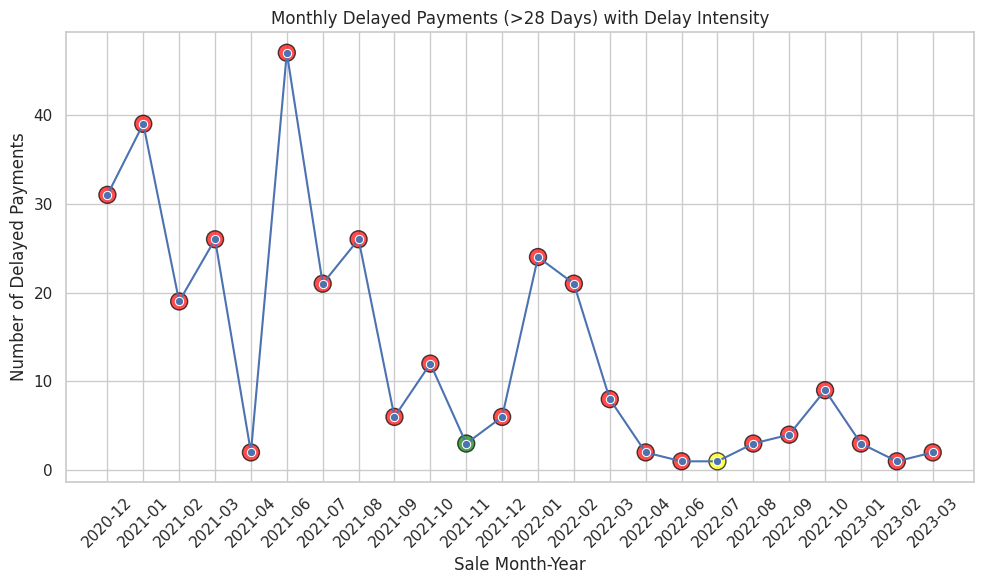

In [ ]:
# ------------------------ INSTALL & IMPORT ------------------------
!pip install -q rapidfuzz

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import process, fuzz
from collections import defaultdict

# ------------------------ CLEANING CUSTOMER NAMES ------------------------
# Step 1: Basic cleanup (upper-case and strip)
sales_df['Customer Name'] = sales_df['Customer Name'].str.upper().str.strip()
credit_df['Customer Name'] = credit_df['Customer Name'].str.upper().str.strip()

# Step 2: Fuzzy name clustering (from sales)
unique_names = sales_df['Customer Name'].unique()
clusters = defaultdict(list)
processed = set()

for name in unique_names:
    if name in processed:
        continue
    matches = process.extract(name, unique_names, scorer=fuzz.token_sort_ratio, limit=None)
    root = name
    for match_name, score, _ in matches:
        if score >= 90 and match_name not in processed:
            clusters[root].append(match_name)
            processed.add(match_name)

# Step 3: Create mapping (variant → root)
final_mapping = {}
for root, variants in clusters.items():
    for v in variants:
        final_mapping[v] = root

# Step 4: Apply mapping to both sales and credit
sales_df['Customer Name Clean'] = sales_df['Customer Name'].map(final_mapping)
credit_df['Customer Name Clean'] = credit_df['Customer Name'].map(final_mapping)

# ------------------------ PROCESSING DATES ------------------------
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True, errors='coerce')
credit_df['Payment_Date'] = pd.to_datetime(credit_df['Payment_Date'], dayfirst=True, errors='coerce')

# ------------------------ MERGE & DELAY LOGIC ------------------------
merged_df = pd.merge(
    sales_df[['Customer Name Clean', 'Date']],
    credit_df[['Customer Name Clean', 'Payment_Date']],
    on='Customer Name Clean',
    how='inner'
)

# Keep only payments after or on the sale date
merged_df = merged_df[merged_df['Payment_Date'] >= merged_df['Date']]

# Calculate delay in days
merged_df['Days_Delayed'] = (merged_df['Payment_Date'] - merged_df['Date']).dt.days
merged_df['Is_Delayed'] = merged_df['Days_Delayed'] > 28
merged_df['Month_Year'] = merged_df['Date'].dt.to_period('M').astype(str)

# ------------------------ AGGREGATE SUMMARY ------------------------
delay_summary = merged_df[merged_df['Is_Delayed']].groupby('Month_Year').agg(
    Delayed_Payments_Count=('Is_Delayed', 'sum'),
    Avg_Days_Delayed=('Days_Delayed', 'mean')
).reset_index()

# ------------------------ PLOT ------------------------
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_Year', y='Delayed_Payments_Count', data=delay_summary, marker='o')

# Color code by delay intensity
colors = delay_summary['Avg_Days_Delayed'].apply(
    lambda x: 'green' if x <= 45 else ('yellow' if x <= 75 else 'red')
)

plt.scatter(
    delay_summary['Month_Year'],
    delay_summary['Delayed_Payments_Count'],
    c=colors, s=150, alpha=0.7, edgecolor='black'
)

plt.title('Monthly Delayed Payments (>28 Days) with Delay Intensity')
plt.xlabel('Sale Month-Year')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


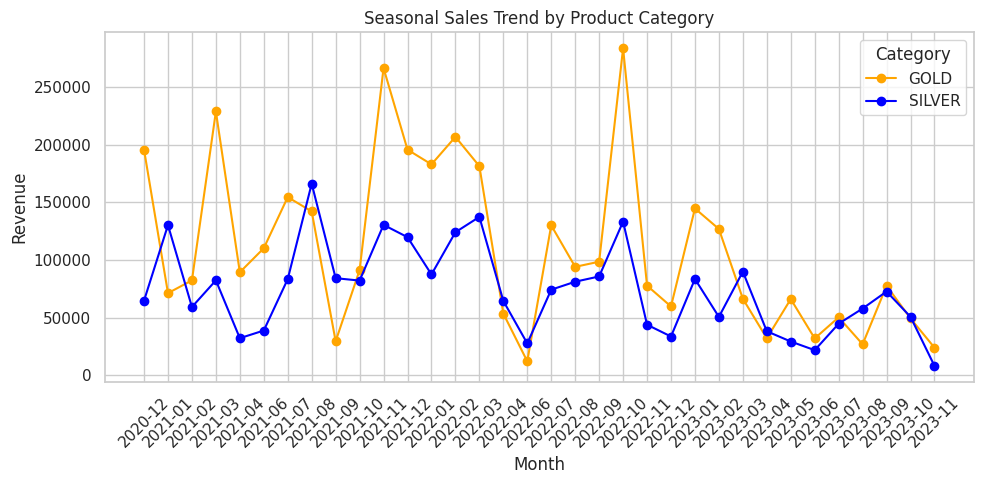

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' to Month
sales_df['Month'] = sales_df['Date'].dt.to_period('M').astype(str)

# Group revenue by Month and Category
seasonality_data = sales_df.groupby(['Month', 'Category']).agg(
    Revenue=('Total Amount(₹)', 'sum')).reset_index()

# Define custom colors
custom_colors = {
    'GOLD': 'orange',
    'SILVER': 'blue'
}

# Plot
plt.figure(figsize=(10,5))
for cat in seasonality_data['Category'].unique():
    cat_data = seasonality_data[seasonality_data['Category'] == cat]
    plt.plot(
        cat_data['Month'],
        cat_data['Revenue'],
        marker='o',
        label=cat,
        color=custom_colors.get(cat, 'gray')  # Fallback to gray if not mapped
    )

plt.title('Seasonal Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
